In [12]:
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('us-uk-reviews_Post.csv')

#shape of the dataframe
print('The shape of the dataframe is :',df.shape)

#first few records
df.head()

The shape of the dataframe is : (917, 3)


,date,reviews,Unnamed: 2
0,20200301,"Woeful, expansive, and magical artistry. A mes...",NaN
1,20200301,"Throughout my life I have always heard, about ...",NaN
2,20200301,This is the first book brought my emotions lik...,NaN
3,20200301,very intresting,NaN
4,20200301,"A life changing book, absolutely loved it",NaN


In [14]:
df.dropna()
df['reviews'].isnull().sum()

0

In [15]:
df['reviews']= df['reviews'].str.lower()
df['reviews'].head()

0    woeful, expansive, and magical artistry. a mes...
1    throughout my life i have always heard, about ...
2    this is the first book brought my emotions lik...
3                                      very intresting
4            a life changing book, absolutely loved it
Name: reviews, dtype: object

In [16]:
all_r = df['reviews'].str.split(' ')
all_r.head()

0    [woeful,, expansive,, and, magical, artistry.,...
1    [throughout, my, life, i, have, always, heard,...
2    [this, is, the, first, book, brought, my, emot...
3                                   [very, intresting]
4    [a, life, changing, book,, absolutely, loved, it]
Name: reviews, dtype: object

In [17]:
all_r_cleaned = []

for text in all_r:
    text = [x.strip(string.punctuation) for x in text]
    all_r_cleaned.append(text)

all_r_cleaned[0]

text_spam = [" ".join(text) for text in all_r_cleaned]
final_text_spam = " ".join(text_spam)
final_text_spam[:500]

'woeful expansive and magical artistry a mesmerizing and provocative novel that leaves you spellbound as well as aching a must read throughout my life i have always heard about big brother but i had not read this book the scary parts of this book can relate to 2020 there are many things now that might come to pass due to climate change or of the possibility of a nuclear war i enjoyed this book even though it scared the living hell out of me this is the first book brought my emotions like a roller'

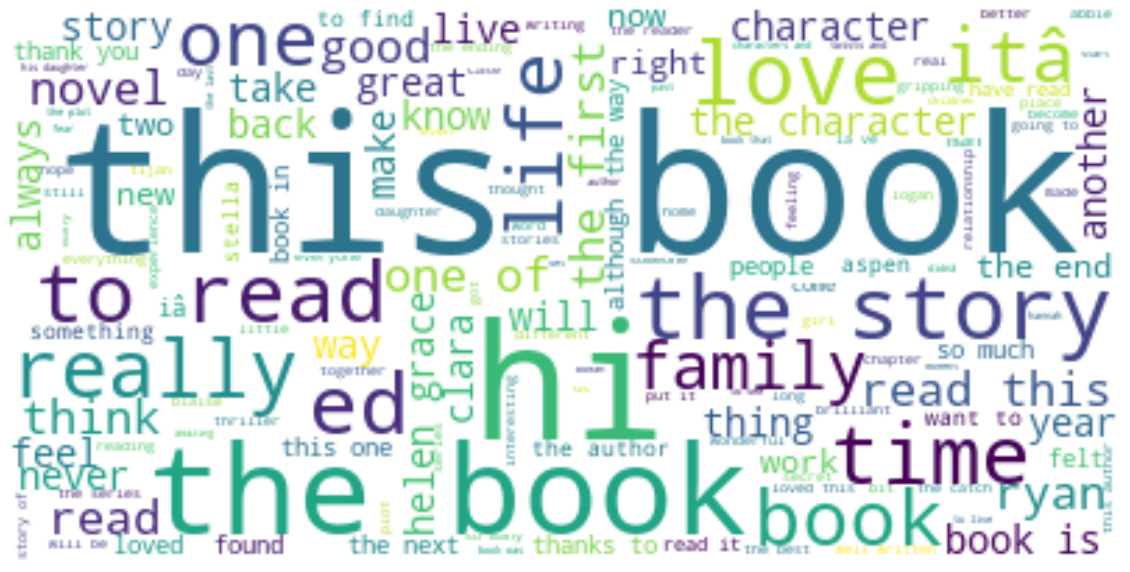

In [18]:
wordcloud_spam = WordCloud(background_color="white").generate(final_text_spam)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

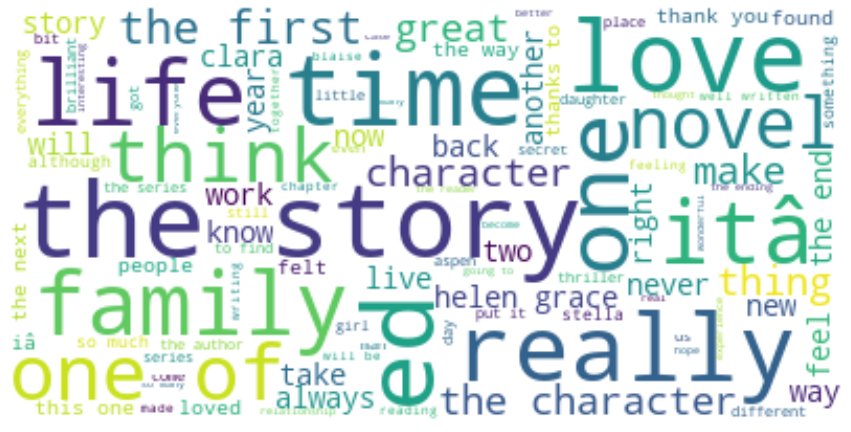

In [21]:
stopwords = set(STOPWORDS)
stopwords.update(["this","book", "the","ryan","thi","good","must","read", "to", "want", "hi", "ha", "best"])

wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_text_spam)

# Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
filtered_words_spam = [word for word in final_text_spam.split() if word not in stopwords]
counted_words_spam = collections.Counter(filtered_words_spam)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(30):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: one, count: 457
Word: story, count: 398
Word: will, count: 261
Word: books, count: 227
Word: characters, count: 219
Word: really, count: 213
Word: life, count: 197
Word: love, count: 192
Word: loved, count: 191
Word: family, count: 190
Word: well, count: 189
Word: ed, count: 186
Word: time, count: 182
Word: first, count: 179
Word: reading, count: 176
Word: great, count: 166
Word: series, count: 166
Word: ryan, count: 160
Word: way, count: 146
Word: much, count: 145
Word: helen, count: 142
Word: written, count: 132
Word: put, count: 131
Word: author, count: 126
Word: daughter, count: 122
Word: enjoyed, count: 118
Word: itâ€™s, count: 117
Word: back, count: 116
Word: end, count: 113
Word: many, count: 111
